In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv', on_bad_lines='skip')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
# info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [4]:
# desciption of the data
data.describe()

,strength
count,669640.000000
mean,0.990196
std,0.507948
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [5]:
# count of strengths or class value to be predicted
data['strength'].value_counts()

strength
1    496801
0     89702
2     83137
Name: count, dtype: int64

In [6]:
# checking null value in dataset
data.isna().sum()

password    1
strength    0
dtype: int64

In [7]:
# dropping the null values in row
data=data.dropna(axis=0)

In [8]:
## shape of the data
data.shape

(669639, 2)

# Data Visualisation && Exploration

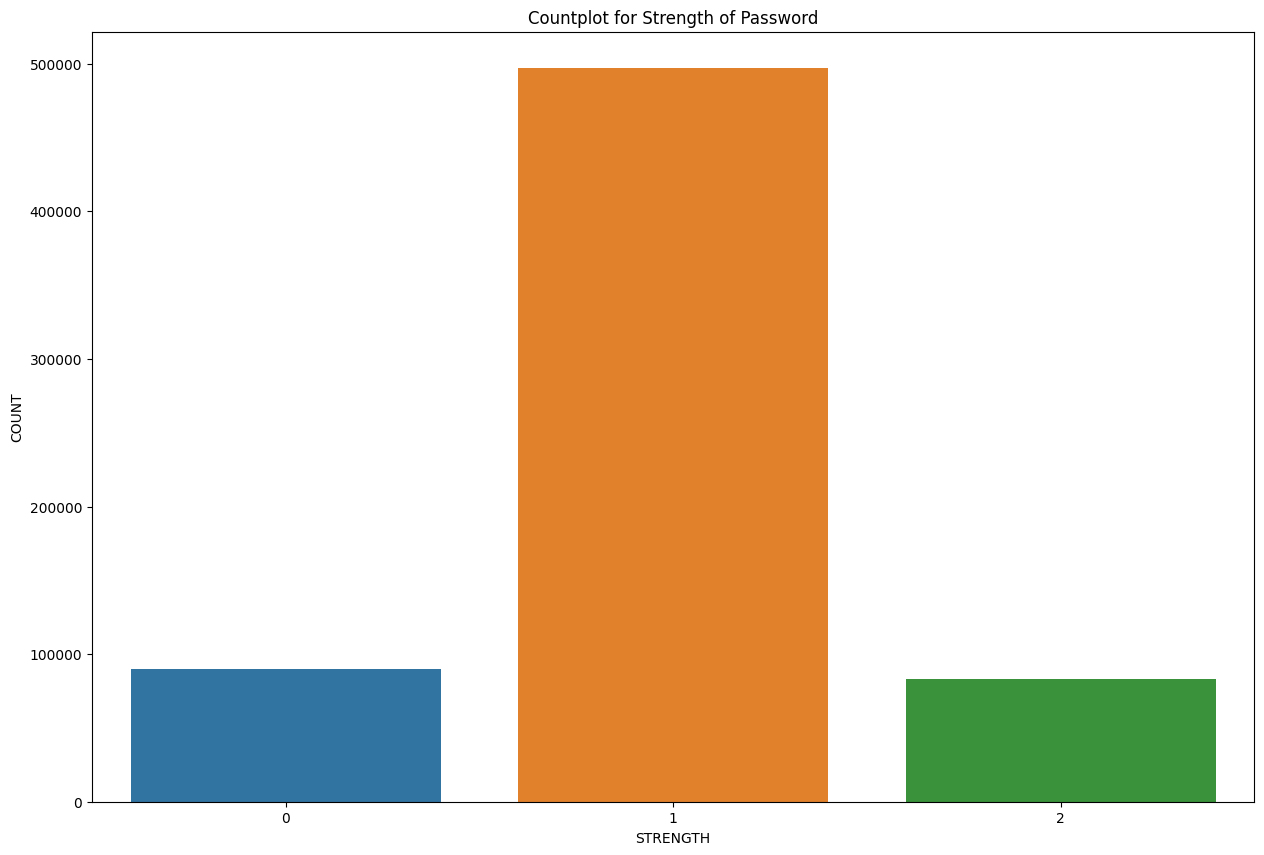

In [9]:
# figure for strength
plt.figure(figsize=(15,10))
sns.countplot(x=data['strength'])
plt.title('Countplot for Strength of Password')
plt.xlabel('STRENGTH')
plt.ylabel('COUNT')
plt.show()

In [10]:
data['password']=data['password'].astype('str')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669639 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669639 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [12]:
import re

In [13]:
def cal_len(x):
    '''
    Calculates the length of a given password.
    '''
    x=str(x)
    return len(x)

def cal_capL(x):
    '''
    Calculates the number of capital letters in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.isupper()):
            cnt+=1
    return cnt

def cal_smL(x):
    '''
    Calculates the nu,ber of small letters in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.islower()):
            cnt+=1
    return cnt

def cal_spc(x):
    '''
    Calculates the number of special characters in the password.
    '''
    x=str(x)
    return (len(x)-len(re.findall('[\w]',x)))


length=lambda x:cal_len(x)
capital=lambda x:cal_capL(x)
small=lambda x:cal_smL(x)
special=lambda x:cal_spc(x)

data['length']=pd.DataFrame(data.password.apply(length))
data['capital']=pd.DataFrame(data.password.apply(capital))
data['small']=pd.DataFrame(data.password.apply(small))
data['special']=pd.DataFrame(data.password.apply(special))

In [14]:
# five elements from the top
data.head()

,password,strength,length,capital,small,special
0,kzde5577,1,8,0,4,0
1,kino3434,1,8,0,4,0
2,visi7k1yr,1,9,0,7,0
3,megzy123,1,8,0,5,0
4,lamborghin1,1,11,0,10,0


In [15]:
def cal_num(x):
    '''
    Calculates the number of numeric values in the password.
    '''
    x=str(x)
    cnt=0
    for i in x:
        if(i.isnumeric()):
            cnt+=1
    return cnt

numeric=lambda x:cal_num(x)
data['numeric']=pd.DataFrame(data.password.apply(cal_num))

In [16]:
# five elements from the top
data.head()

,password,strength,length,capital,small,special,numeric
0,kzde5577,1,8,0,4,0,4
1,kino3434,1,8,0,4,0,4
2,visi7k1yr,1,9,0,7,0,2
3,megzy123,1,8,0,5,0,3
4,lamborghin1,1,11,0,10,0,1


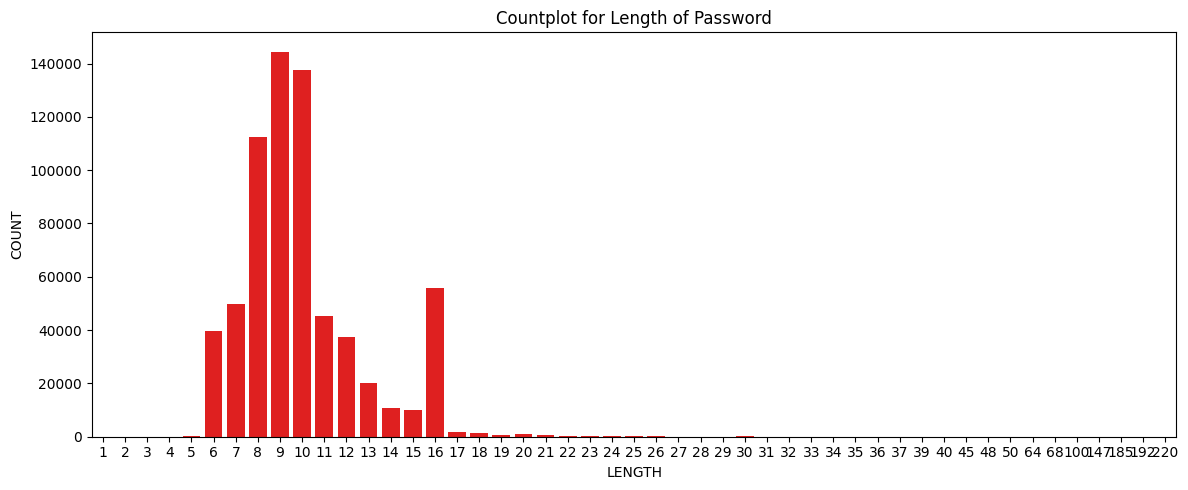

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x=data['length'],color='red')
plt.title('Countplot for Length of Password')
plt.xlabel('LENGTH')
plt.ylabel('COUNT')
plt.tight_layout()
plt.show()

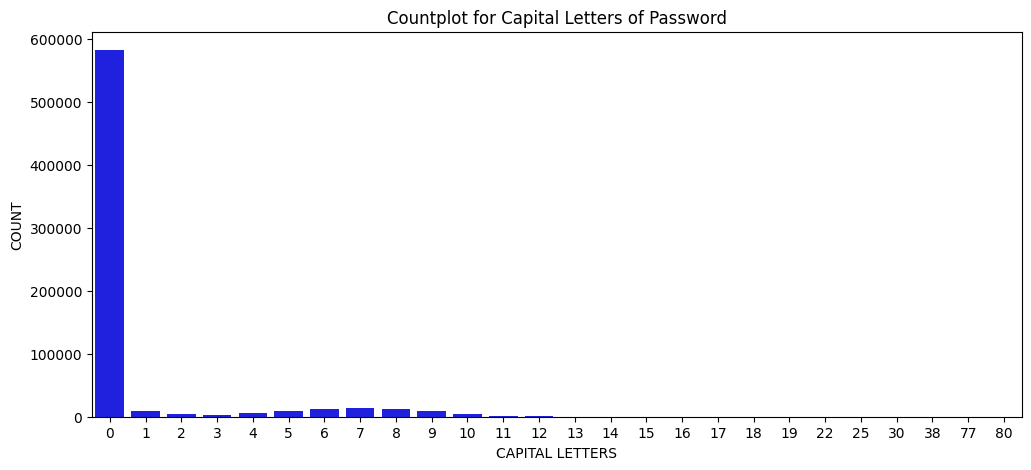

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x=data['capital'],color='blue')
plt.title('Countplot for Capital Letters of Password')
plt.xlabel('CAPITAL LETTERS')
plt.ylabel('COUNT')
plt.show()

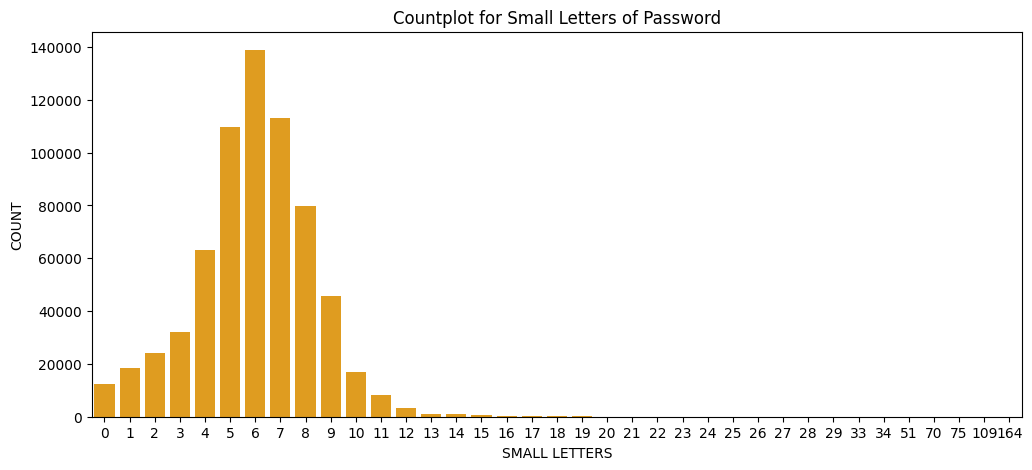

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x=data['small'],color='orange')
plt.title('Countplot for Small Letters of Password')
plt.xlabel('SMALL LETTERS')
plt.ylabel('COUNT')
plt.show()

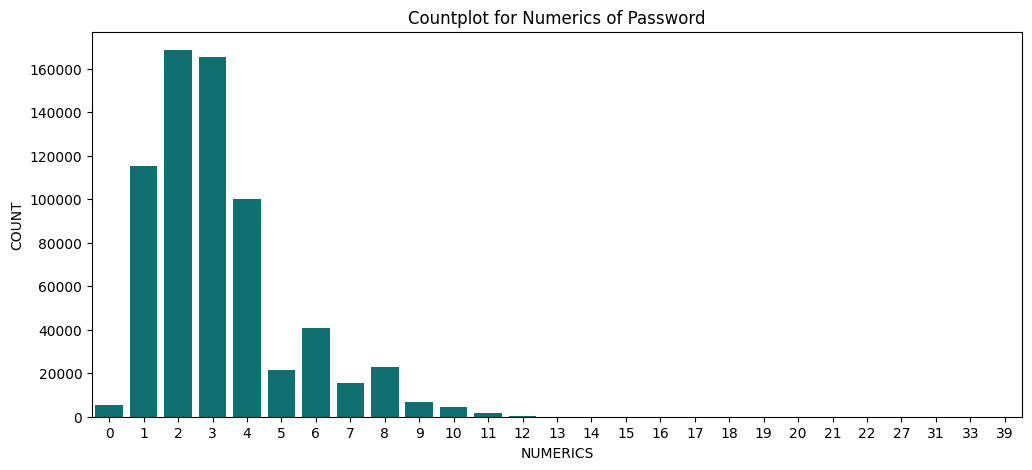

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(x=data['numeric'],color='teal')
plt.title('Countplot for Numerics of Password')
plt.xlabel('NUMERICS')
plt.ylabel('COUNT')
plt.show()

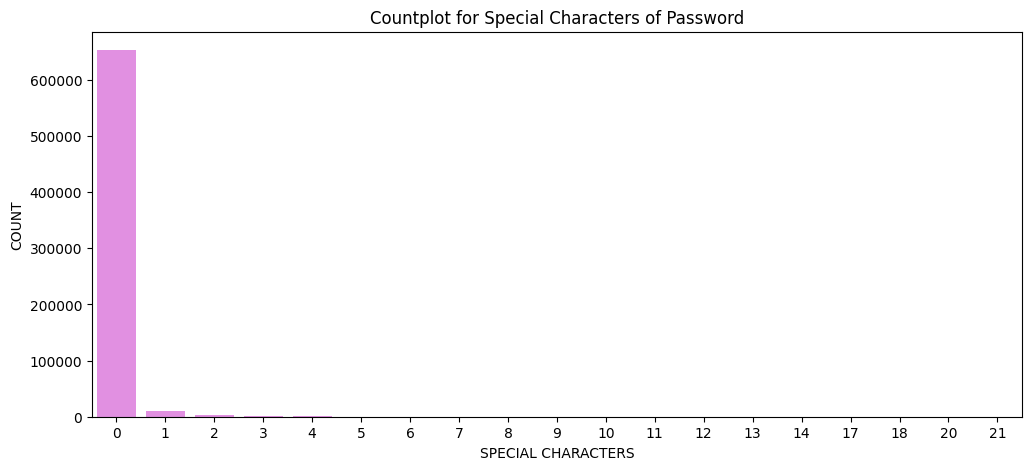

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x=data['special'],color='violet')
plt.title('Countplot for Special Characters of Password')
plt.xlabel('SPECIAL CHARACTERS')
plt.ylabel('COUNT')
plt.show()

# Different Models && Their Accuracy

# 1. Multi-Layer Perceptron

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
data.head()

,password,strength,length,capital,small,special,numeric
0,kzde5577,1,8,0,4,0,4
1,kino3434,1,8,0,4,0,4
2,visi7k1yr,1,9,0,7,0,2
3,megzy123,1,8,0,5,0,3
4,lamborghin1,1,11,0,10,0,1


In [24]:
x = data[['length','capital','small','special','numeric']].values
y = data['strength'].values

In [25]:
x.shape

(669639, 5)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

(133928, 5) (133928,)
(535711, 5) (535711,)


In [27]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
model_mlp = MLPClassifier(hidden_layer_sizes=(6,20),max_iter=300, verbose=True)
model_mlp.fit(x_train,y_train)

Iteration 1, loss = 0.10107085
Iteration 2, loss = 0.00298208
Iteration 3, loss = 0.00150346
Iteration 4, loss = 0.00077770
Iteration 5, loss = 0.00047482
Iteration 6, loss = 0.00033394
Iteration 7, loss = 0.00025291
Iteration 8, loss = 0.00020423
Iteration 9, loss = 0.00017028
Iteration 10, loss = 0.00015637
Iteration 11, loss = 0.00012721
Iteration 12, loss = 0.00012238
Iteration 13, loss = 0.00010508
Iteration 14, loss = 0.00008975
Iteration 15, loss = 0.00006435
Iteration 16, loss = 0.00009639
Iteration 17, loss = 0.00005120
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(6, 20), max_iter=300, verbose=True)

In [29]:
y_pred = model_mlp.predict(x_test)

In [30]:
print("The accuracy of the model is: ",accuracy_score(y_test,y_pred)*100)

The accuracy of the model is:  99.99850666029508


In [31]:
print("Classification Report : \n",classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17927
           1       1.00      1.00      1.00     99304
           2       1.00      1.00      1.00     16697

    accuracy                           1.00    133928
   macro avg       1.00      1.00      1.00    133928
weighted avg       1.00      1.00      1.00    133928



In [32]:
print("The confusion matrix is: \n", confusion_matrix(y_test,y_pred))

The confusion matrix is: 
 [[17927     0     0]
 [    0 99303     1]
 [    0     1 16696]]


In [33]:
# Training accuracy
train_acc_mlp = accuracy_score(y_train, model_mlp.predict(x_train))
train_acc_mlp

1.0

In [34]:
# Testing accuracy
test_acc_mlp = accuracy_score(y_test, model_mlp.predict(x_test))
test_acc_mlp

0.9999850666029508

# 2. Logestic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
x = data['password'].values
y = data['strength'].values

In [37]:
x

array(['kzde5577', 'kino3434', 'visi7k1yr', ..., '184520socram',
       'marken22a', 'fxx4pw4g'], dtype=object)

In [38]:
def word_divide_char(inputs):
    characters = []
    for i in inputs:
        characters.append(i)
    return characters
print(word_divide_char('AVYq1lDE4MgAZfNt'))

['A', 'V', 'Y', 'q', '1', 'l', 'D', 'E', '4', 'M', 'g', 'A', 'Z', 'f', 'N', 't']


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)

In [40]:
X = vectorizer.fit_transform(x)
X.shape

(669639, 153)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(535711, 153) (535711,)
(133928, 153) (133928,)


In [42]:
model_lr = LogisticRegression(random_state=0, multi_class='multinomial')
model_lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [43]:
y_pred = model_lr.predict(X_test)

In [44]:
print("The accuracy of the model is: ",accuracy_score(y_test,y_pred)*100)

The accuracy of the model is:  81.8223224419091


In [45]:
print("Classification Report : \n",classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.58      0.29      0.39     18006
           1       0.84      0.94      0.88     99290
           2       0.81      0.69      0.75     16632

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



In [46]:
print("The confusion matrix is: \n", confusion_matrix(y_test,y_pred))

The confusion matrix is: 
 [[ 5248 12742    16]
 [ 3822 92858  2610]
 [   36  5119 11477]]


In [47]:
# Training accuracy
train_acc_lr = accuracy_score(y_train, model_lr.predict(X_train))
train_acc_lr

0.8194007589913218

In [48]:
# Testing accuracy
test_acc_lr = accuracy_score(y_test, model_lr.predict(X_test))
test_acc_lr

0.8182232244190909

# 3. Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
model_clf=DecisionTreeClassifier()

In [50]:
model_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = model_clf.predict(X_test)

In [52]:
print("The accuracy of the model is: ",accuracy_score(y_test,y_pred)*100)

The accuracy of the model is:  92.49223463353444


In [53]:
print("Classification Report : \n",classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     18006
           1       0.95      0.95      0.95     99290
           2       0.86      0.85      0.86     16632

    accuracy                           0.92    133928
   macro avg       0.88      0.88      0.88    133928
weighted avg       0.92      0.92      0.92    133928



In [54]:
print("The confusion matrix is: \n", confusion_matrix(y_test,y_pred))

The confusion matrix is: 
 [[15089  2755   162]
 [ 2526 94655  2109]
 [  321  2182 14129]]


In [55]:
# Training accuracy
train_acc_clf = accuracy_score(y_train, model_clf.predict(X_train))
train_acc_clf

0.9997517318106218

In [56]:
# Testing accuracy
test_acc_clf = accuracy_score(y_test, model_clf.predict(X_test))
test_acc_clf

0.9249223463353443